## Final Project Submission

Please fill out:
* Student name: Moses Lin
* Student pace: full time
* Scheduled project review date/time: 6/22/2020
* Instructor name: Sean Abu Wilson
* Blog post URL:


# Source:

Data was downloaded from Kaggle, and contains data of 17007 strategy games from the Apple App store.

https://www.kaggle.com/tristan581/17k-apple-app-store-strategy-games

# Questions going into this project:
- Should new game devs develop mobile games that are free to play or pay to play?
- If I choose to make a game pay to play, does it matter how expensive it is?
- Should I cater to a specific age group when developing mobile games?
- What are the most important features when developing a strategy game?
- What types of microtransactions should I focus on the most?

In [1]:
# Importing data and taking a look

import pandas as pd
pd.set_option('display.max_columns', 300)
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.style.use('seaborn')
sns.set(style="white")
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from math import exp

In [2]:
df = pd.read_csv('appstore_games.csv')
df

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17002,https://apps.apple.com/us/app/stack-puzzle-ris...,1474626442,Stack Puzzle : Rise Tower,"Blast the cubes, solve puzzle!",https://is5-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,NaN,"The goal is very simple, move the square horiz...",Zhigang Pei,4+,EN,64795648.0,Games,"Games, Entertainment, Casual, Strategy",30/07/2019,30/07/2019
17003,https://apps.apple.com/us/app/eachother/id1474...,1474919257,EachOther,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,NaN,Collect a score while you play!!\n\nBy linking...,Sultan Shindi,4+,EN,110341120.0,Games,"Games, Family, Strategy",1/08/2019,1/08/2019
17004,https://apps.apple.com/us/app/rabbit-vs-tortoi...,1474962324,Rabbit Vs Tortoise,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,NaN,"""Rabbit Vs Tortoise is chess type cool simple ...",Vishal Baldha,4+,EN,23207936.0,Games,"Games, Strategy",3/08/2019,3/08/2019
17005,https://apps.apple.com/us/app/fatall/id1474963671,1474963671,FaTaLL,Most fun game!!!,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,"9.99, 49.99, 3.99",Upgrade your character and use your skills to ...,Tayrem Games,4+,EN,196750336.0,Games,"Games, Strategy, Action",1/08/2019,1/08/2019


# Cleaning Data

As usual, first thing to do is to check for null values. It is ideal to fill in values for observations if possible instead of outright removing them, as we would be losing a lot of data.

In [3]:
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

df.isna().sum()
#Checking how many missing numbers there are

URL                                 0
ID                                  0
Name                                0
Subtitle                        11746
Icon URL                            0
Average User Rating              9446
User Rating Count                9446
Price                              24
In-app Purchases                 9324
Description                         0
Developer                           0
Age Rating                          0
Languages                          60
Size                                1
Primary Genre                       0
Genres                              0
Original Release Date               0
Current Version Release Date        0
dtype: int64

In [4]:
#Dropping columns that don't seem particularly useful.
#Do not know much about developers and there are too many different devs, cannot really use this info.
#Subtitle column has too many null values and not any real way to fill in for a phrase.
df.drop(columns=['URL', 'ID', 'Subtitle', 'Icon URL', 'Developer'], inplace=True)
df.shape

(17007, 13)

Unique IDs such as URL, ID, Icon URL should not be used for regression as they are different for each reading and typically provide no useful inference.

In [5]:
#drop rows with null values
df = df.dropna()
df.shape

#Still have enough observations to continue.

(4618, 13)

In [6]:
#Converting bytes to kilobytes
df['Size'] = df['Size'].apply(lambda b : b//(2**10))
#Checking what our data looks like so far
df.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
5,Sudoku - Classic number puzzle,3.0,47.0,0.0,1.99,"Sudoku will tease your brain, challenge you or...",4+,EN,47532.0,Games,"Games, Entertainment, Strategy, Puzzle",30/07/2008,29/04/2019
15,Awele/Oware - Mancala HD,3.0,112.0,0.0,0.99,Awele/Oware is the oldest African board game a...,4+,"EN, FR, DE, IT, ES",119948.0,Games,"Games, Strategy, Board",31/08/2008,6/04/2015
16,Awele/Oware - Mancala HD,3.0,112.0,0.0,0.99,Awele/Oware is the oldest African board game a...,4+,"EN, FR, DE, IT, ES",119948.0,Games,"Games, Strategy, Board",31/08/2008,6/04/2015
18,Catcha Mouse,3.5,95971.0,0.0,"1.99, 0.99, 1.99, 0.99, 4.99, 1.99, 1.99",*More than 4 Million downloads!!!\n\n#1 iPhone...,4+,EN,26192.0,Games,"Games, Puzzle, Strategy",19/02/2009,26/04/2013
19,"Cool Sudoku, Jigsaw, Killer",3.5,357.0,0.0,"0.99, 0.99, 0.99","You can now play Sudoku, Killer Sudoku, Jigsaw...",4+,EN,51012.0,Games,"Games, Strategy, Puzzle, Entertainment",24/09/2008,26/04/2019


Now that our data is cleaned up, we can analyze some of the data

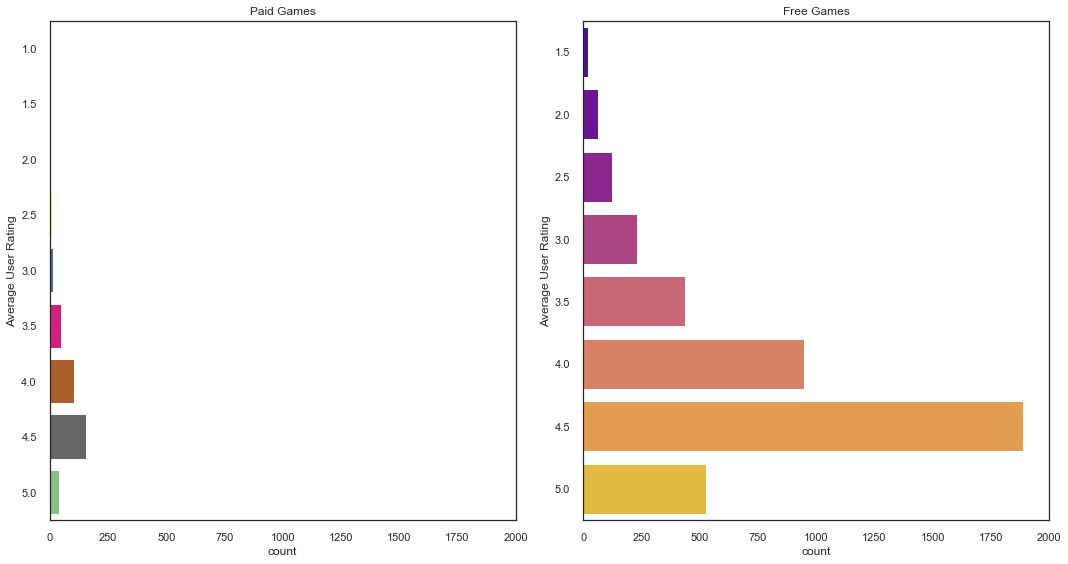

In [7]:
paid = df[df['Price']>0]
free = df[df['Price']==0]
fig, ax = plt.subplots(1, 2, figsize=(15,8))
sns.countplot(data=paid, y='Average User Rating', ax=ax[0], palette='Accent')
ax[0].set_title('Paid Games')
ax[0].set_xlim([0, 2000])

sns.countplot(data=free, y='Average User Rating', ax=ax[1], palette='plasma')
ax[1].set_title('Free Games')
ax[1].set_xlim([0, 2000])
plt.tight_layout();
plt.show()

As we can see from plotting average user ratings vs count for both free and paid games, it is very clear that free games are more likely to get downloads and thus ratings than games locked behind an initial investment. As a result, it may be favorable for new mobile game developers to begin working on F2P games over paid games if they want to develop a reputation of having highly rated games.

# Feature Engineering

Interpreting data in certain columns in a different way such that they can be used for regression.

In [8]:
#GenreList is to check if there's any correlation between genres
#Removing Strategy and Games tag, as the dataset name inherently implies every app is a Strategy Game.
df['GenreList'] = df['Genres'].apply(lambda s : s.replace('Strategy','').replace('Games','').replace('&',' ').replace(',', ' ').split()) 
df['GenreList'].head()
#GenreNumber is to create a new column to count the number of genres each game has.
df['GenreNumber'] = df['Genres'].apply(lambda s : s.replace('&',' ').replace(',', ' ').split()) 
df['GenreNumber'].head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


5     [Games, Entertainment, Strategy, Puzzle]
15                    [Games, Strategy, Board]
16                    [Games, Strategy, Board]
18                   [Games, Puzzle, Strategy]
19    [Games, Strategy, Puzzle, Entertainment]
Name: GenreNumber, dtype: object

In [9]:
gameTypes = []
for i in df['GenreList']: gameTypes += i
gameTypes = set(gameTypes)
len(gameTypes)

39

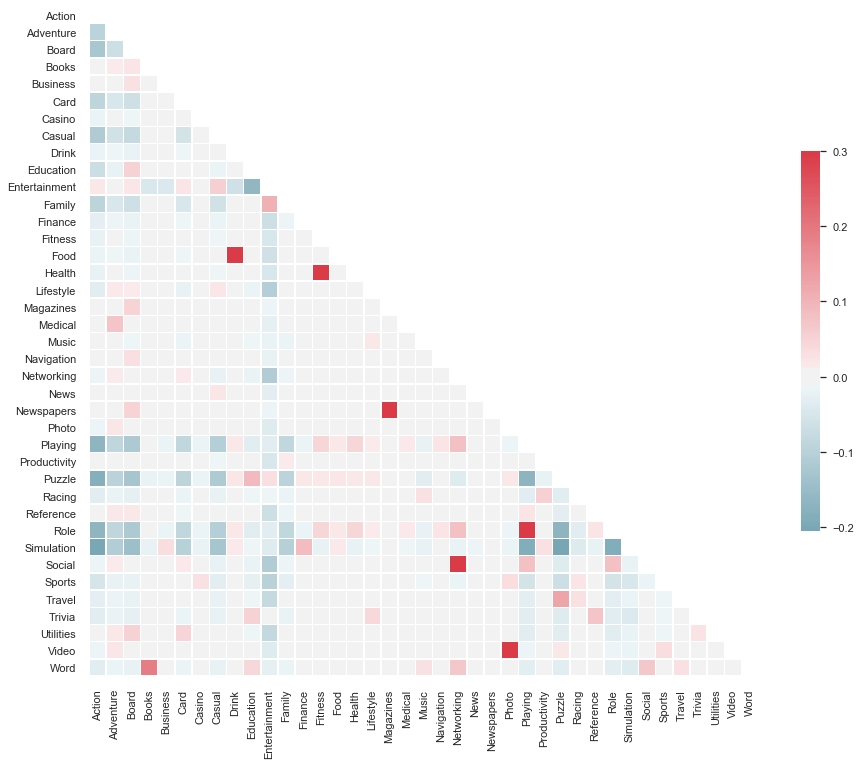

In [10]:
from sklearn.preprocessing import MultiLabelBinarizer

test = df['GenreList']
mlb = MultiLabelBinarizer()
res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)

corr = res.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 14))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

Perhaps when releasing a game, it is not too important to tag genres with collinearity together. However, none of these values are over 0.9, so it's also possible that one should tag as many relevant tags as possible.

Genres with high correlation:
- Food and Drink
- Word and Books
- Newspapers and Magazines
- Social and Networking
- Role and Playing
- Video and Photo

In [11]:
#Checking to see
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
GenreData = mlb.fit_transform(df['GenreList'])
GenreClasses = mlb.classes_
print(GenreClasses)

GenreLabels = pd.DataFrame(GenreData, columns=GenreClasses)
GenreLabels.sum().values

['Action' 'Adventure' 'Board' 'Books' 'Business' 'Card' 'Casino' 'Casual'
 'Drink' 'Education' 'Entertainment' 'Family' 'Finance' 'Fitness' 'Food'
 'Health' 'Lifestyle' 'Magazines' 'Medical' 'Music' 'Navigation'
 'Networking' 'News' 'Newspapers' 'Photo' 'Playing' 'Productivity'
 'Puzzle' 'Racing' 'Reference' 'Role' 'Simulation' 'Social' 'Sports'
 'Travel' 'Trivia' 'Utilities' 'Video' 'Word']


array([ 699,  221,  379,    9,    8,  199,    8,  314,   18,  117, 2312,
        207,   20,   11,   18,   11,   52,    1,    3,   29,    2,   57,
          4,    1,    6,  622,   10,  722,   31,   20,  622,  858,   57,
        108,   29,   32,   31,    6,   27])

Text(0.5, 1.0, 'Genre Count in Strategy Games')

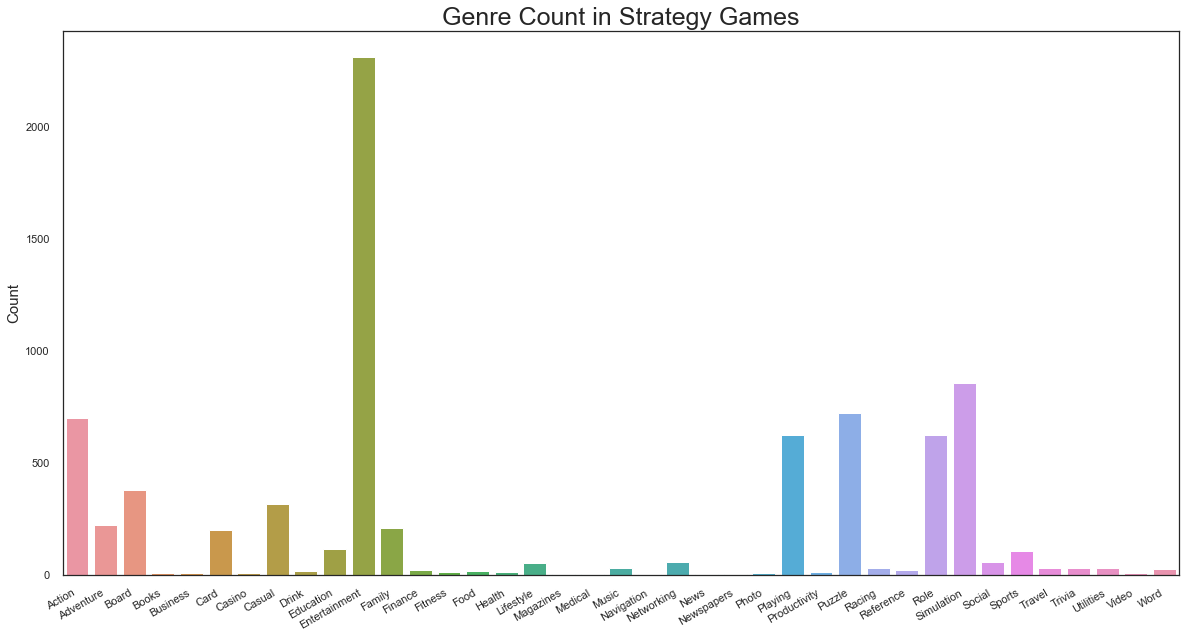

In [12]:
categories = list(GenreLabels.columns.values)
plt.figure(figsize=(20,10))
bplot = sns.barplot(categories, GenreLabels.sum().values)
bplot.set_xticklabels(bplot.get_xticklabels(), rotation='30', ha="right");
bplot.set_ylabel('Count', fontsize=15)
bplot.set_title('Genre Count in Strategy Games', fontsize=25)

It appears that Entertainment is the most popular genre, though every game is technically also classified as entertainment. As a result, we can look at the next most popular genres, that being Simulation, Puzzle, and Action.

In [13]:
res.corr()

,Action,Adventure,Board,Books,Business,Card,Casino,Casual,Drink,Education,Entertainment,Family,Finance,Fitness,Food,Health,Lifestyle,Magazines,Medical,Music,Navigation,Networking,News,Newspapers,Photo,Playing,Productivity,Puzzle,Racing,Reference,Role,Simulation,Social,Sports,Travel,Trivia,Utilities,Video,Word
Action,1.000000,-0.094682,-0.126281,-0.004963,-0.003064,-0.089622,-0.017593,-0.114072,-0.016722,-0.068091,0.015764,-0.091489,-0.027854,-0.020637,-0.016722,-0.020637,-0.033618,-0.006215,-0.010768,-0.010628,-0.008791,-0.014380,0.008103,-0.006215,-0.015233,-0.166622,-0.006676,-0.181807,-0.034719,-0.009452,-0.166622,-0.201744,-0.014380,-0.053361,-0.025925,-0.035278,-0.005122,-0.015233,-0.032388
Adventure,-0.094682,1.000000,-0.067036,0.013095,-0.009339,-0.047575,-0.009339,-0.060555,-0.014024,-0.023235,0.008839,-0.048566,-0.014786,-0.010955,-0.014024,-0.010955,0.014532,-0.003299,0.073911,-0.004980,-0.004667,0.011689,-0.006601,-0.003299,0.020075,-0.088451,0.011380,-0.096511,-0.018430,0.016111,-0.088451,-0.107095,0.011689,-0.021268,-0.017822,-0.018727,0.018839,0.020075,-0.017193
Board,-0.126281,-0.067036,1.000000,0.022564,0.025487,-0.063453,-0.012456,-0.080764,-0.018704,0.052203,0.020913,-0.064775,-0.019721,-0.014611,-0.018704,-0.014611,0.012953,0.049219,-0.007624,-0.013783,0.031695,0.002301,-0.008804,0.049219,-0.010785,-0.117970,0.003043,-0.128720,-0.024581,0.016323,-0.117970,-0.142836,0.002301,-0.020169,-0.023770,-0.024977,0.052713,-0.010785,-0.022931
Books,-0.004963,0.013095,0.022564,1.000000,-0.001841,-0.009377,-0.001841,-0.011936,-0.002764,-0.007125,-0.044247,-0.009573,-0.002914,-0.002159,-0.002764,-0.002159,-0.004716,-0.000650,-0.001127,-0.003513,-0.000920,-0.004940,-0.001301,-0.000650,-0.001594,0.011330,-0.002059,-0.019023,-0.003633,-0.002914,0.011330,-0.021109,-0.004940,-0.006838,-0.003513,-0.003691,-0.003633,-0.001594,0.189815
Business,-0.003064,-0.009339,0.025487,-0.001841,1.000000,-0.008840,-0.001735,-0.011252,-0.002606,-0.006716,-0.041712,-0.009024,-0.002747,-0.002036,-0.002606,-0.002036,-0.004446,-0.000613,-0.001062,-0.003312,-0.000867,-0.004657,-0.001227,-0.000613,-0.001503,-0.016435,-0.001941,-0.017933,-0.003425,-0.002747,-0.016435,0.033653,-0.004657,-0.006446,-0.003312,-0.003480,-0.003425,-0.001503,-0.003195
Card,-0.089622,-0.047575,-0.063453,-0.009377,-0.008840,1.000000,-0.008840,-0.057318,-0.013275,-0.000284,0.022118,-0.045971,-0.013996,0.011506,-0.013275,0.011506,-0.022646,-0.003123,-0.005411,-0.016870,-0.004417,0.014910,-0.006248,-0.003123,-0.007654,-0.083723,-0.009886,-0.091353,-0.017445,-0.013996,-0.083723,-0.101371,0.014910,-0.011671,-0.003370,-0.017726,0.047851,-0.007654,-0.016274
Casino,-0.017593,-0.009339,-0.012456,-0.001841,-0.001735,-0.008840,1.000000,-0.011252,-0.002606,-0.006716,0.010360,-0.009024,-0.002747,-0.002036,-0.002606,-0.002036,-0.004446,-0.000613,-0.001062,-0.003312,-0.000867,-0.004657,-0.001227,-0.000613,-0.001503,-0.016435,-0.001941,-0.017933,-0.003425,-0.002747,-0.016435,-0.019900,-0.004657,0.028009,-0.003312,-0.003480,-0.003425,-0.001503,-0.003195
Casual,-0.114072,-0.060555,-0.080764,-0.011936,-0.011252,-0.057318,-0.011252,1.000000,0.010714,-0.016178,0.058143,-0.058512,-0.017814,-0.013198,0.010714,-0.013198,0.020090,-0.003975,-0.006887,-0.010583,-0.005622,-0.022404,0.021288,-0.003975,-0.009742,-0.106564,-0.012583,-0.116275,-0.022205,-0.004714,-0.106564,-0.129026,-0.022404,-0.030414,-0.021472,-0.022562,-0.011670,-0.009742,-0.020714
Drink,-0.016722,-0.014024,-0.018704,-0.002764,-0.002606,-0.013275,-0.002606,0.010714,1.000000,-0.010085,-0.062636,0.003244,-0.004126,-0.003057,1.000000,-0.003057,-0.006676,-0.000921,-0.001595,-0.004973,-0.001302,-0.006993,-0.001842,-0.000921,-0.002256,0.016039,-0.002914,0.020916,-0.005142,-0.004126,0.016039,0.014794,-0.006993,-0.009680,-0.004973,-0.005225,-0.005142,-0.002256,-0.004797
Education,-0.068091,-0.023235,0.052203,-0.007125,-0.006716,-0.000284,-0.006716,-0.016178,-0.010085,1.000000,-0.161437,-0.008288,-0.010633,-0.007878,-0.010085,-0.007878,-0.017206,

In [14]:
#Creating new features that can be used for analysis
df['Desc Length'] = df['Description'].apply(lambda row: len(row))
# Length of description is a general marker for how much effort is put into attracting potential users.
df['Name Length'] = df['Name'].apply(lambda row: len(row))
# Length of name is the only way to really use this variable.
df['Num of Lang'] = df['Languages'].apply(lambda row: len(row))
# Number of languages may affect accessibility to the app
df['Num of Genres'] = df['GenreNumber'].apply(lambda row: len(row))
# Number of genres may affect how easily an app is found in search queries.
df.drop(columns=['GenreList', 'GenreNumber'], inplace=True)
# removing those two columns as they're only needed for calculation.
df.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,Desc Length,Name Length,Num of Lang,Num of Genres
5,Sudoku - Classic number puzzle,3.0,47.0,0.0,1.99,"Sudoku will tease your brain, challenge you or...",4+,EN,47532.0,Games,"Games, Entertainment, Strategy, Puzzle",30/07/2008,29/04/2019,2255,30,2,4
15,Awele/Oware - Mancala HD,3.0,112.0,0.0,0.99,Awele/Oware is the oldest African board game a...,4+,"EN, FR, DE, IT, ES",119948.0,Games,"Games, Strategy, Board",31/08/2008,6/04/2015,618,24,18,3
16,Awele/Oware - Mancala HD,3.0,112.0,0.0,0.99,Awele/Oware is the oldest African board game a...,4+,"EN, FR, DE, IT, ES",119948.0,Games,"Games, Strategy, Board",31/08/2008,6/04/2015,618,24,18,3
18,Catcha Mouse,3.5,95971.0,0.0,"1.99, 0.99, 1.99, 0.99, 4.99, 1.99, 1.99",*More than 4 Million downloads!!!\n\n#1 iPhone...,4+,EN,26192.0,Games,"Games, Puzzle, Strategy",19/02/2009,26/04/2013,794,12,2,3
19,"Cool Sudoku, Jigsaw, Killer",3.5,357.0,0.0,"0.99, 0.99, 0.99","You can now play Sudoku, Killer Sudoku, Jigsaw...",4+,EN,51012.0,Games,"Games, Strategy, Puzzle, Entertainment",24/09/2008,26/04/2019,1039,27,2,4


In [15]:
#Calculating the difference in days between two dates for features.
from datetime import datetime

def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d %H:%M:%S")
    d2 = datetime.strptime(d2, "%Y-%m-%d %H:%M:%S")
    return abs((d2 - d1).days)

#Converting all the values into a useable format
df['Original Release Date'] = pd.to_datetime(df['Original Release Date'], format = '%d/%m/%Y')
df['Current Version Release Date'] = pd.to_datetime(df['Current Version Release Date'], format = '%d/%m/%Y')

#Creating new features by applying formula. Aug 3rd 2019 was date of data collection for this set.
df['Days from Launch'] = df['Original Release Date'].apply(lambda row: days_between(f'{row}', '2019-08-03 0:0:0'))
df['Days since update'] = df['Current Version Release Date'].apply(lambda row: days_between(f'{row}', '2019-08-03 0:0:0'))
df.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,Desc Length,Name Length,Num of Lang,Num of Genres,Days from Launch,Days since update
5,Sudoku - Classic number puzzle,3.0,47.0,0.0,1.99,"Sudoku will tease your brain, challenge you or...",4+,EN,47532.0,Games,"Games, Entertainment, Strategy, Puzzle",2008-07-30,2019-04-29,2255,30,2,4,4021,96
15,Awele/Oware - Mancala HD,3.0,112.0,0.0,0.99,Awele/Oware is the oldest African board game a...,4+,"EN, FR, DE, IT, ES",119948.0,Games,"Games, Strategy, Board",2008-08-31,2015-04-06,618,24,18,3,3989,1580
16,Awele/Oware - Mancala HD,3.0,112.0,0.0,0.99,Awele/Oware is the oldest African board game a...,4+,"EN, FR, DE, IT, ES",119948.0,Games,"Games, Strategy, Board",2008-08-31,2015-04-06,618,24,18,3,3989,1580
18,Catcha Mouse,3.5,95971.0,0.0,"1.99, 0.99, 1.99, 0.99, 4.99, 1.99, 1.99",*More than 4 Million downloads!!!\n\n#1 iPhone...,4+,EN,26192.0,Games,"Games, Puzzle, Strategy",2009-02-19,2013-04-26,794,12,2,3,3817,2290
19,"Cool Sudoku, Jigsaw, Killer",3.5,357.0,0.0,"0.99, 0.99, 0.99","You can now play Sudoku, Killer Sudoku, Jigsaw...",4+,EN,51012.0,Games,"Games, Strategy, Puzzle, Entertainment",2008-09-24,2019-04-26,1039,27,2,4,3965,99


In [16]:
#Creating dummy variables for Age Rating
#This enables us to use regression to represent multiple groups
df['Age Rating'].value_counts()

4+     2475
9+     1032
12+     951
17+     160
Name: Age Rating, dtype: int64

In [17]:
#concatenate to main df
dummy = pd.get_dummies(df['Age Rating'])
df = pd.concat([df,dummy], axis=1)
df.head()

,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,Desc Length,Name Length,Num of Lang,Num of Genres,Days from Launch,Days since update,12+,17+,4+,9+
5,Sudoku - Classic number puzzle,3.0,47.0,0.0,1.99,"Sudoku will tease your brain, challenge you or...",4+,EN,47532.0,Games,"Games, Entertainment, Strategy, Puzzle",2008-07-30,2019-04-29,2255,30,2,4,4021,96,0,0,1,0
15,Awele/Oware - Mancala HD,3.0,112.0,0.0,0.99,Awele/Oware is the oldest African board game a...,4+,"EN, FR, DE, IT, ES",119948.0,Games,"Games, Strategy, Board",2008-08-31,2015-04-06,618,24,18,3,3989,1580,0,0,1,0
16,Awele/Oware - Mancala HD,3.0,112.0,0.0,0.99,Awele/Oware is the oldest African board game a...,4+,"EN, FR, DE, IT, ES",119948.0,Games,"Games, Strategy, Board",2008-08-31,2015-04-06,618,24,18,3,3989,1580,0,0,1,0
18,Catcha Mouse,3.5,95971.0,0.0,"1.99, 0.99, 1.99, 0.99, 4.99, 1.99, 1.99",*More than 4 Million downloads!!!\n\n#1 iPhone...,4+,EN,26192.0,Games,"Games, Puzzle, Strategy",2009-02-19,2013-04-26,794,12,2,3,3817,2290,0,0,1,0
19,"Cool Sudoku, Jigsaw, Killer",3.5,357.0,0.0,"0.99, 0.99, 0.99","You can now play Sudoku, Killer Sudoku, Jigsaw...",4+,EN,51012.0,Games,"Games, Strategy, Puzzle, Entertainment",2008-09-24,2019-04-26,1039,27,2,4,3965,99,0,0,1,0


In [18]:
#going to make a dummy for each in-app purchase option
df['In-app Purchases'].value_counts()

0.99                                                                 390
1.99                                                                 249
2.99                                                                 205
0.99, 0.99                                                            73
4.99                                                                  68
                                                                    ... 
2.99, 2.99, 4.99                                                       1
0.99, 0.99, 3.99, 0.99, 3.99, 2.99, 3.99, 1.99, 5.99, 9.99             1
19.99, 4.99, 9.99, 99.99, 29.99, 49.99, 0.99, 29.99, 99.99, 49.99      1
4.99, 0.99, 19.99, 4.99, 19.99, 4.99, 19.99, 19.99, 99.99, 4.99        1
1.99, 4.99, 1.99, 9.99, 4.99, 15.99, 19.99, 24.99, 9.99, 36.99         1
Name: In-app Purchases, Length: 2955, dtype: int64

In [19]:
mlb = MultiLabelBinarizer()
iapData = mlb.fit_transform(df['In-app Purchases'].str.split(', '))
labelClasses = mlb.classes_
print(labelClasses)

iapLabels = pd.DataFrame(iapData, columns=labelClasses)
iapLabels.head()

['0' '0.0' '0.99' '1.49' '1.99' '10.99' '109.99' '11.99' '119.99' '12.99'
 '129.99' '13.99' '139.99' '14.99' '15.99' '16.99' '169.99' '17.99'
 '18.99' '19.49' '19.99' '199.99' '2.49' '2.99' '20.99' '21.99' '22.99'
 '23.49' '23.99' '24.99' '25.99' '26.99' '27.99' '28.99' '29.99' '3.49'
 '3.99' '30.99' '31.99' '32.99' '33.99' '34.99' '35.99' '36.99' '37.99'
 '38.99' '39.99' '4.49' '4.99' '40.99' '41.99' '43.99' '44.99' '45.99'
 '46.99' '47.99' '48.99' '49.99' '5.49' '5.99' '54.99' '59.99' '6.99'
 '64.99' '69.99' '7.49' '7.99' '74.99' '79.99' '8.49' '8.99' '84.99'
 '89.99' '9.49' '9.99' '94.99' '99.99']


,0,0.0,0.99,1.49,1.99,10.99,109.99,11.99,119.99,12.99,129.99,13.99,139.99,14.99,15.99,16.99,169.99,17.99,18.99,19.49,19.99,199.99,2.49,2.99,20.99,21.99,22.99,23.49,23.99,24.99,25.99,26.99,27.99,28.99,29.99,3.49,3.99,30.99,31.99,32.99,33.99,34.99,35.99,36.99,37.99,38.99,39.99,4.49,4.99,40.99,41.99,43.99,44.99,45.99,46.99,47.99,48.99,49.99,5.49,5.99,54.99,59.99,6.99,64.99,69.99,7.49,7.99,74.99,79.99,8.49,8.99,84.99,89.99,9.49,9.99,94.99,99.99
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
finaldf = pd.concat([df.reset_index(drop=True),iapLabels.reset_index(drop=True)], axis=1)
finaldf

,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,Desc Length,Name Length,Num of Lang,Num of Genres,Days from Launch,Days since update,12+,17+,4+,9+,0,0.0,0.99,1.49,1.99,10.99,109.99,11.99,119.99,12.99,129.99,13.99,139.99,14.99,15.99,16.99,169.99,17.99,18.99,19.49,19.99,199.99,2.49,2.99,20.99,21.99,22.99,23.49,23.99,24.99,25.99,26.99,27.99,28.99,29.99,3.49,3.99,30.99,31.99,32.99,33.99,34.99,35.99,36.99,37.99,38.99,39.99,4.49,4.99,40.99,41.99,43.99,44.99,45.99,46.99,47.99,48.99,49.99,5.49,5.99,54.99,59.99,6.99,64.99,69.99,7.49,7.99,74.99,79.99,8.49,8.99,84.99,89.99,9.49,9.99,94.99,99.99
0,Sudoku - Classic number puzzle,3.0,47.0,0.0,1.99,"Sudoku will tease your brain, challenge you or...",4+,EN,47532.0,Games,"Games, Entertainment, Strategy, Puzzle",2008-07-30,2019-04-29,2255,30,2,4,4021,96,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Awele/Oware - Mancala HD,3.0,112.0,0.0,0.99,Awele/Oware is the oldest African board game a...,4+,"EN, FR, DE, IT, ES",119948.0,Games,"Games, Strategy, Board",2008-08-31,2015-04-06,618,24,18,3,3989,1580,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Awele/Oware - Mancala HD,3.0,112.0,0.0,0.99,Awele/Oware is the oldest African board game a...,4+,"EN, FR, DE, IT, ES",119948.0,Games,"Games, Strategy, Board",2008-08-31,2015-04-06,618,24,18,3,3989,1580,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Catcha Mouse,3.5,95971.0,0.0,"1.99, 0.99, 1.99, 0.99, 4.99, 1.99, 1.99",*More than 4 Million downloads!!!\n\n#1 iPhone...,4+,EN,26192.0,Games,"Games, Puzzle, Strategy",2009-02-19,2013-04-26,794,12,2,3,3817,2290,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Cool Sudoku, Jigsaw, Killer",3.5,357.0,0.0,"0.99, 0.99, 0.99","You can now play Sudoku, Killer Sudoku, Jigsaw...",4+,EN,51012.0,Games,"Games, Strategy, Puzzle, Entertainment",2008-09-24,2019-04-26,1039,27,2,4,3965,99,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4613,Zipline Valley,4.5,14.0,0.0,2.99,"""Physics game lovers enjoy this new puzzle gam...",4+,"AR, ZH, EN, FR, DE, JA, KO, PT, RU, ES, TR",185423.0,Games,"Games, Puzzle, Strategy",2019-08-01,2019-08-01,1120,14,42,3,2,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4614,Lordz2.io Conquest,3.0,17.0,0.0,"4.99, 1.99, 9.99, 4.99, 4.99, 4.99, 4.99, 4.99",Fun Fast paced RTS game! Play against real pla...,4+,EN,208268.0,Games,"Games, Action, Strategy",2019-08-01,2019-08-01,3980,18,2,3,2,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4615,Smartphone Tycoon 2,2.5,29.0,0.0,"1.99, 1.99, 1.99, 2.99, 5.99, 3.99, 5.99, 2.99...",Welcome to Smartphone Tycoon! In this business...,4+,EN,84058.0,Games,"Games, Simulation, Strategy",2019-07-31,2019-07-31,255,19,2,3,3,3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,

# Correlation of features through heatmap

After generating the new features, I will be checking if there is any collinearity between them.
The goal of regression analysis is to isolate the relationship between a dependent variable and an independent variable to obtain a coefficient. Multicollinearity will make it difficult to isolate said relationship, as independent variables will be changing simultaneously.

In [21]:
#Dropping modified features/target feature
feature_df = finaldf.drop(['Name', 'Average User Rating', 'In-app Purchases', 'Description', 'Age Rating', 'Languages', 'Primary Genre', 'Genres', 'Original Release Date', 'Current Version Release Date'], axis=1)
feature_df

,User Rating Count,Price,Size,Desc Length,Name Length,Num of Lang,Num of Genres,Days from Launch,Days since update,12+,17+,4+,9+,0,0.0,0.99,1.49,1.99,10.99,109.99,11.99,119.99,12.99,129.99,13.99,139.99,14.99,15.99,16.99,169.99,17.99,18.99,19.49,19.99,199.99,2.49,2.99,20.99,21.99,22.99,23.49,23.99,24.99,25.99,26.99,27.99,28.99,29.99,3.49,3.99,30.99,31.99,32.99,33.99,34.99,35.99,36.99,37.99,38.99,39.99,4.49,4.99,40.99,41.99,43.99,44.99,45.99,46.99,47.99,48.99,49.99,5.49,5.99,54.99,59.99,6.99,64.99,69.99,7.49,7.99,74.99,79.99,8.49,8.99,84.99,89.99,9.49,9.99,94.99,99.99
0,47.0,0.0,47532.0,2255,30,2,4,4021,96,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,112.0,0.0,119948.0,618,24,18,3,3989,1580,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,112.0,0.0,119948.0,618,24,18,3,3989,1580,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,95971.0,0.0,26192.0,794,12,2,3,3817,2290,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,357.0,0.0,51012.0,1039,27,2,4,3965,99,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4613,14.0,0.0,185423.0,1120,14,42,3,2,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4614,17.0,0.0,208268.0,3980,18,2,3,2,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4615,29.0,0.0,84058.0,255,19,2,3,3,3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4616,51.0,0.0,193566.0,682,26,70,3,5,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [22]:
corr = feature_df.corr()
corr

,User Rating Count,Price,Size,Desc Length,Name Length,Num of Lang,Num of Genres,Days from Launch,Days since update,12+,17+,4+,9+,0,0.0,0.99,1.49,1.99,10.99,109.99,11.99,119.99,12.99,129.99,13.99,139.99,14.99,15.99,16.99,169.99,17.99,18.99,19.49,19.99,199.99,2.49,2.99,20.99,21.99,22.99,23.49,23.99,24.99,25.99,26.99,27.99,28.99,29.99,3.49,3.99,30.99,31.99,32.99,33.99,34.99,35.99,36.99,37.99,38.99,39.99,4.49,4.99,40.99,41.99,43.99,44.99,45.99,46.99,47.99,48.99,49.99,5.49,5.99,54.99,59.99,6.99,64.99,69.99,7.49,7.99,74.99,79.99,8.49,8.99,84.99,89.99,9.49,9.99,94.99,99.99
User Rating Count,1.000000,-0.004974,0.042560,0.058066,-0.032302,0.082856,0.017472,0.030394,-0.060439,-0.002336,0.015170,-0.045861,0.050511,-0.002182,0.006928,0.015681,-0.002108,-0.005948,0.002177,0.000006,-0.001521,-0.001296,0.012445,0.001292,0.006427,0.011560,-0.000947,0.001674,-0.004064,0.002588,-0.004217,-0.006902,-0.001297,0.073640,-0.001691,0.002504,0.029495,-0.004938,-0.002204,-0.003457,0.002572,0.001763,0.019539,-0.005867,0.003371,-0.001678,-0.001175,0.009213,0.014874,-0.004003,-0.002603,-0.002278,0.002641,0.003818,0.020608,-0.002042,0.001177,-0.002573,0.007588,0.010583,-0.002014,0.061908,-0.002538,-0.001795,-0.001791,-0.006087,-0.005047,-0.001862,-0.001633,-0.003443,0.065545,-0.000441,0.006553,-0.005502,-0.000666,0.015194,-0.004095,0.002380,0.004779,0.014472,0.006593,0.006454,-0.001569,-0.005992,0.000613,-0.007231,-0.001652,0.075146,-0.003078,0.069534
Price,-0.004974,1.000000,0.084576,0.091614,-0.020563,-0.017092,0.007482,0.067984,-0.020092,0.025371,-0.009029,-0.026529,0.011095,0.007699,0.021390,-0.045692,-0.003106,0.016509,-0.010750,-0.002536,0.001567,-0.001793,0.001778,-0.001793,-0.010150,-0.001793,-0.015638,-0.009856,-0.000051,-0.001793,-0.006397,0.004924,-0.001793,-0.057077,-0.003106,-0.002536,-0.014572,0.002187,0.001686,-0.006955,-0.001793,-0.005060,-0.017879,-0.008717,-0.003203,-0.000811,0.004209,-0.026505,-0.001793,-0.013788,-0.005075,-0.000053,-0.003587,-0.004747,-0.006731,0.004597,-0.002536,0.009960,-0.003106,-0.008401,-0.004011,-0.039177,-0.004394,-0.002536,-0.002536,-0.007473,0.006872,-0.001239,-0.002536,-0.001229,-0.050983,-0.003587,-0.012037,-0.006647,0.161817,-0.000354,-0.006718,-0.004977,-0.002536,-0.000400,-0.005953,-0.007434,-0.002536,-0.005559,-0.004011,-0.002972,-0.002536,-0.024454,-0.008035,-0.042142
Size,0.042560,0.084576,1.000000,0.216957,-0.080483,0.072051,-0.020448,-0.248605,-0.261588,0.230964,0.052928,-0.270670,0.076595,-0.012621,0.054394,-0.037483,-0.000543,-0.006431,0.000865,0.012516,0.034793,-0.001326,0.025273,0.002591,0.088558,-0.002537,0.087383,-0.006010,0.010075,-0.003682,0.038073,-0.000462,-0.005806,0.167335,-0.009719,-0.007738,0.018053,0.001384,-0.005443,0.001596,-0.003587,0.042791,0.069970,0.029916,0.075212,0.001929,0.023108,0.117452,0.002941,0.020101,0.003024,0.032348,0.003562,0.008327,-0.005291,0.031855,-0.006270,-0.006210,-0.008841,0.011673,0.029334,0.204192,0.003752,0.012226,0.003341,0.057826,0.001284,0.052164,0.005677,0.000374,0.155133,-0.000243,0.011858,0.003424,0.016537,0.040541,0.036851,0.020430,-0.005267,0.023959,-0.008648,0.009863,-0.005522,0.067084,-0.007116,0.057609,0.023030,0.195934,-0.004129,0.171852
Desc Length,0.058066,0.091614,0.216957,1.000000,0.009791,0.105694,0.057576,-0.070168,-0.241865,0.136138,0.046966,-0.237438,0.131479,0.005750,0.036453,0.020916,0.038314,0.052535,0.030513,0.023352,0.042551,-0.014232,0.030196,0.031450,0.037698,0.033901,0.087629,0.007827,0.023732,0.022706,0.051454,0.022671,-0.004248,0.196074,0.001477,0.029473,0.035877,0.007347,-0.011192,0.032238,0.015336,0.031088,0.074164,0.022923,0.022852,-0.007202,0.003320,0.066476,0.014317,0.055709,-0.001300,-0.009180,-0.006385,0.016545,0.020565,-0.000231,-0.001903,0.018575,0.002688,0.026392,0.056127,0.243096,0.016701,0.009513,0.027175,0.028180,0.035831,0.021562,-0.008838,0.008863,0.177385,0.029294,0.069701,0.018840,0.034853,0.084966,0.023629,0.013572,0.032418,0.045104,0.029224,0.032631,0.034006,0.068855,0.044035,0.069626,0.013973,0.209369,0.03554

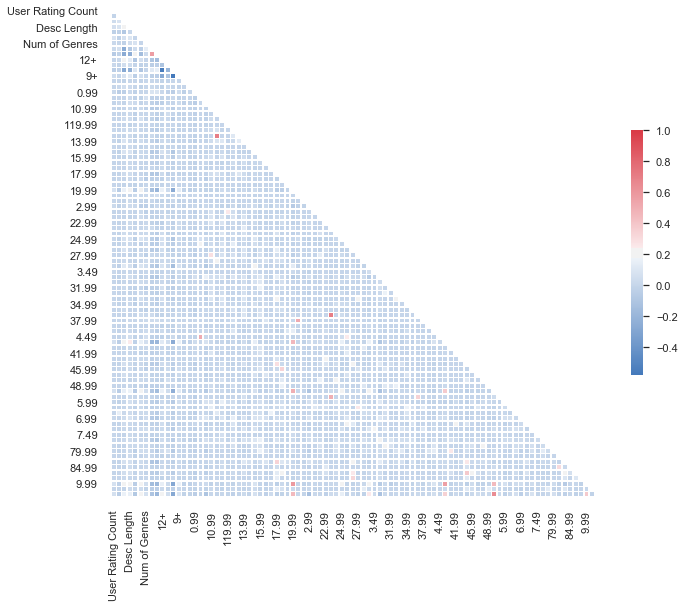

In [23]:
def CorrMtx(feature_df, dropDuplicates = True):

    if dropDuplicates:    
        mask = np.zeros_like(feature_df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(feature_df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)


CorrMtx(corr, dropDuplicates = True)

In [24]:
corr.where((corr > 0.8) & (corr < 1.0)).describe()

,User Rating Count,Price,Size,Desc Length,Name Length,Num of Lang,Num of Genres,Days from Launch,Days since update,12+,17+,4+,9+,0,0.0,0.99,1.49,1.99,10.99,109.99,11.99,119.99,12.99,129.99,13.99,139.99,14.99,15.99,16.99,169.99,17.99,18.99,19.49,19.99,199.99,2.49,2.99,20.99,21.99,22.99,23.49,23.99,24.99,25.99,26.99,27.99,28.99,29.99,3.49,3.99,30.99,31.99,32.99,33.99,34.99,35.99,36.99,37.99,38.99,39.99,4.49,4.99,40.99,41.99,43.99,44.99,45.99,46.99,47.99,48.99,49.99,5.49,5.99,54.99,59.99,6.99,64.99,69.99,7.49,7.99,74.99,79.99,8.49,8.99,84.99,89.99,9.49,9.99,94.99,99.99
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


While there is some red on the heatmap, it seems there are no values with collinearity high enough to require dropping.

# Hypothesis Testing

We will use Chi Squared Contingency to see whether there is a statistical difference between two variables.

----------------
Hypothesis 1:
------
Null Hypothesis: There is no statistical difference between Average User Rating and User Rating Count

Alternative Hypothesis: There is a statistical difference between Average User Rating and User Rating Count

In [25]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
table =  pd.crosstab(df['Average User Rating'],[df['User Rating Count']])

stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
#interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f)' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (regject H0)')
else:
    print('Independent (fail to reject H0)')
#interpret p-value
alpha= 1-prob
print('signigicance=%.3f, p=%.3f,' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else: 
    print('Independent (fail to reject)')

dof=12232
[[8.01212646e-02 7.01602425e-02 5.54352534e-02 ... 4.33087917e-04
  4.33087917e-04 4.33087917e-04]
 [9.61455175e-01 8.41922910e-01 6.65223040e-01 ... 5.19705500e-03
  5.19705500e-03 5.19705500e-03]
 [2.72412300e+00 2.38544825e+00 1.88479861e+00 ... 1.47249892e-02
  1.47249892e-02 1.47249892e-02]
 ...
 [4.22239065e+01 3.69744478e+01 2.92143785e+01 ... 2.28237332e-01
  2.28237332e-01 2.28237332e-01]
 [8.18839324e+01 7.17037679e+01 5.66548289e+01 ... 4.42615851e-01
  4.42615851e-01 4.42615851e-01]
 [2.26743179e+01 1.98553486e+01 1.56881767e+01 ... 1.22563880e-01
  1.22563880e-01 1.22563880e-01]]
probability=0.950, critical=12490.403, stat=6227.637)
Independent (fail to reject H0)
signigicance=0.050, p=1.000,
Independent (fail to reject)


It appears there is a statistically insignificant relationship between Average User Rating and User Rating Count

Hypothesis 2:
----
Null Hypothesis: There is no statistical difference between Average User Rating and Price

Alternative Hypothesis: There is a statistical difference between Average User Rating and Price


In [26]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
table =  pd.crosstab(df['Average User Rating'],[df['Price']])

stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
#interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f)' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (regject H0)')
else:
    print('Independent (fail to reject H0)')
#interpret p-value
alpha= 1-prob
print('signigicance=%.3f, p=%.3f,' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else: 
    print('Independent (fail to reject)')

dof=112
[[1.83456042e+00 4.89389346e-02 3.03161542e-02 3.72455608e-02
  1.12602858e-02 2.51190992e-02 2.16543958e-03 2.16543958e-03
  4.33087917e-04 8.66175834e-04 3.89779125e-03 8.66175834e-04
  4.33087917e-04 1.29926375e-03 4.33087917e-04]
 [2.20147250e+01 5.87267215e-01 3.63793850e-01 4.46946730e-01
  1.35123430e-01 3.01429190e-01 2.59852750e-02 2.59852750e-02
  5.19705500e-03 1.03941100e-02 4.67734950e-02 1.03941100e-02
  5.19705500e-03 1.55911650e-02 5.19705500e-03]
 [6.23750541e+01 1.66392378e+00 1.03074924e+00 1.26634907e+00
  3.82849718e-01 8.54049372e-01 7.36249459e-02 7.36249459e-02
  1.47249892e-02 2.94499783e-02 1.32524903e-01 2.94499783e-02
  1.47249892e-02 4.41749675e-02 1.47249892e-02]
 [1.22915548e+02 3.27890862e+00 2.03118233e+00 2.49545258e+00
  7.54439151e-01 1.68297964e+00 1.45084452e-01 1.45084452e-01
  2.90168904e-02 5.80337809e-02 2.61152014e-01 5.80337809e-02
  2.90168904e-02 8.70506713e-02 2.90168904e-02]
 [2.23816371e+02 5.97055002e+00 3.69857081e+00 4.5439584

It appears there is a statistically significant relationship between Average User Rating and Price

Hypothesis 3:
----
Null Hypothesis: There is no statistical difference between Average User Rating and Size

Alternative Hypothesis: There is a statistical difference between Average User Rating and Size

In [27]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
table =  pd.crosstab(df['Average User Rating'],[df['Size']])

stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
#interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f)' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (regject H0)')
else:
    print('Independent (fail to reject H0)')
#interpret p-value
alpha= 1-prob
print('signigicance=%.3f, p=%.3f,' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else: 
    print('Independent (fail to reject)')

dof=36080
[[8.66175834e-04 4.33087917e-04 4.33087917e-04 ... 4.33087917e-04
  4.33087917e-04 4.33087917e-04]
 [1.03941100e-02 5.19705500e-03 5.19705500e-03 ... 5.19705500e-03
  5.19705500e-03 5.19705500e-03]
 [2.94499783e-02 1.47249892e-02 1.47249892e-02 ... 1.47249892e-02
  1.47249892e-02 1.47249892e-02]
 ...
 [4.56474664e-01 2.28237332e-01 2.28237332e-01 ... 2.28237332e-01
  2.28237332e-01 2.28237332e-01]
 [8.85231702e-01 4.42615851e-01 4.42615851e-01 ... 4.42615851e-01
  4.42615851e-01 4.42615851e-01]
 [2.45127761e-01 1.22563880e-01 1.22563880e-01 ... 1.22563880e-01
  1.22563880e-01 1.22563880e-01]]
probability=0.950, critical=36522.985, stat=36196.038)
Independent (fail to reject H0)
signigicance=0.050, p=0.332,
Independent (fail to reject)


It appears there is a statistically insignificant relationship between Average User Rating and Size

Hypothesis 4:
----
Null Hypothesis: There is no statistical difference between Average User Rating and Desc Length

Alternative Hypothesis: There is a statistical difference between Average User Rating and Desc Length

In [30]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
table =  pd.crosstab(df['Average User Rating'],[df['Desc Length']])

stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
#interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f)' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (regject H0)')
else:
    print('Independent (fail to reject H0)')
#interpret p-value
alpha= 1-prob
print('signigicance=%.3f, p=%.3f,' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else: 
    print('Independent (fail to reject)')

dof=19096
[[1.73235167e-03 8.66175834e-04 4.33087917e-04 ... 4.33087917e-04
  4.33087917e-04 4.33087917e-04]
 [2.07882200e-02 1.03941100e-02 5.19705500e-03 ... 5.19705500e-03
  5.19705500e-03 5.19705500e-03]
 [5.88999567e-02 2.94499783e-02 1.47249892e-02 ... 1.47249892e-02
  1.47249892e-02 1.47249892e-02]
 ...
 [9.12949329e-01 4.56474664e-01 2.28237332e-01 ... 2.28237332e-01
  2.28237332e-01 2.28237332e-01]
 [1.77046340e+00 8.85231702e-01 4.42615851e-01 ... 4.42615851e-01
  4.42615851e-01 4.42615851e-01]
 [4.90255522e-01 2.45127761e-01 1.22563880e-01 ... 1.22563880e-01
  1.22563880e-01 1.22563880e-01]]
probability=0.950, critical=19418.583, stat=20154.610)
Dependent (regject H0)
signigicance=0.050, p=0.000,
Dependent (reject H0)


# Feature Selection through pairplot/OLS model

Because of the sheer number of dummy features in my data, I'll only be looking at the correlation between most of the non-dummy variables.

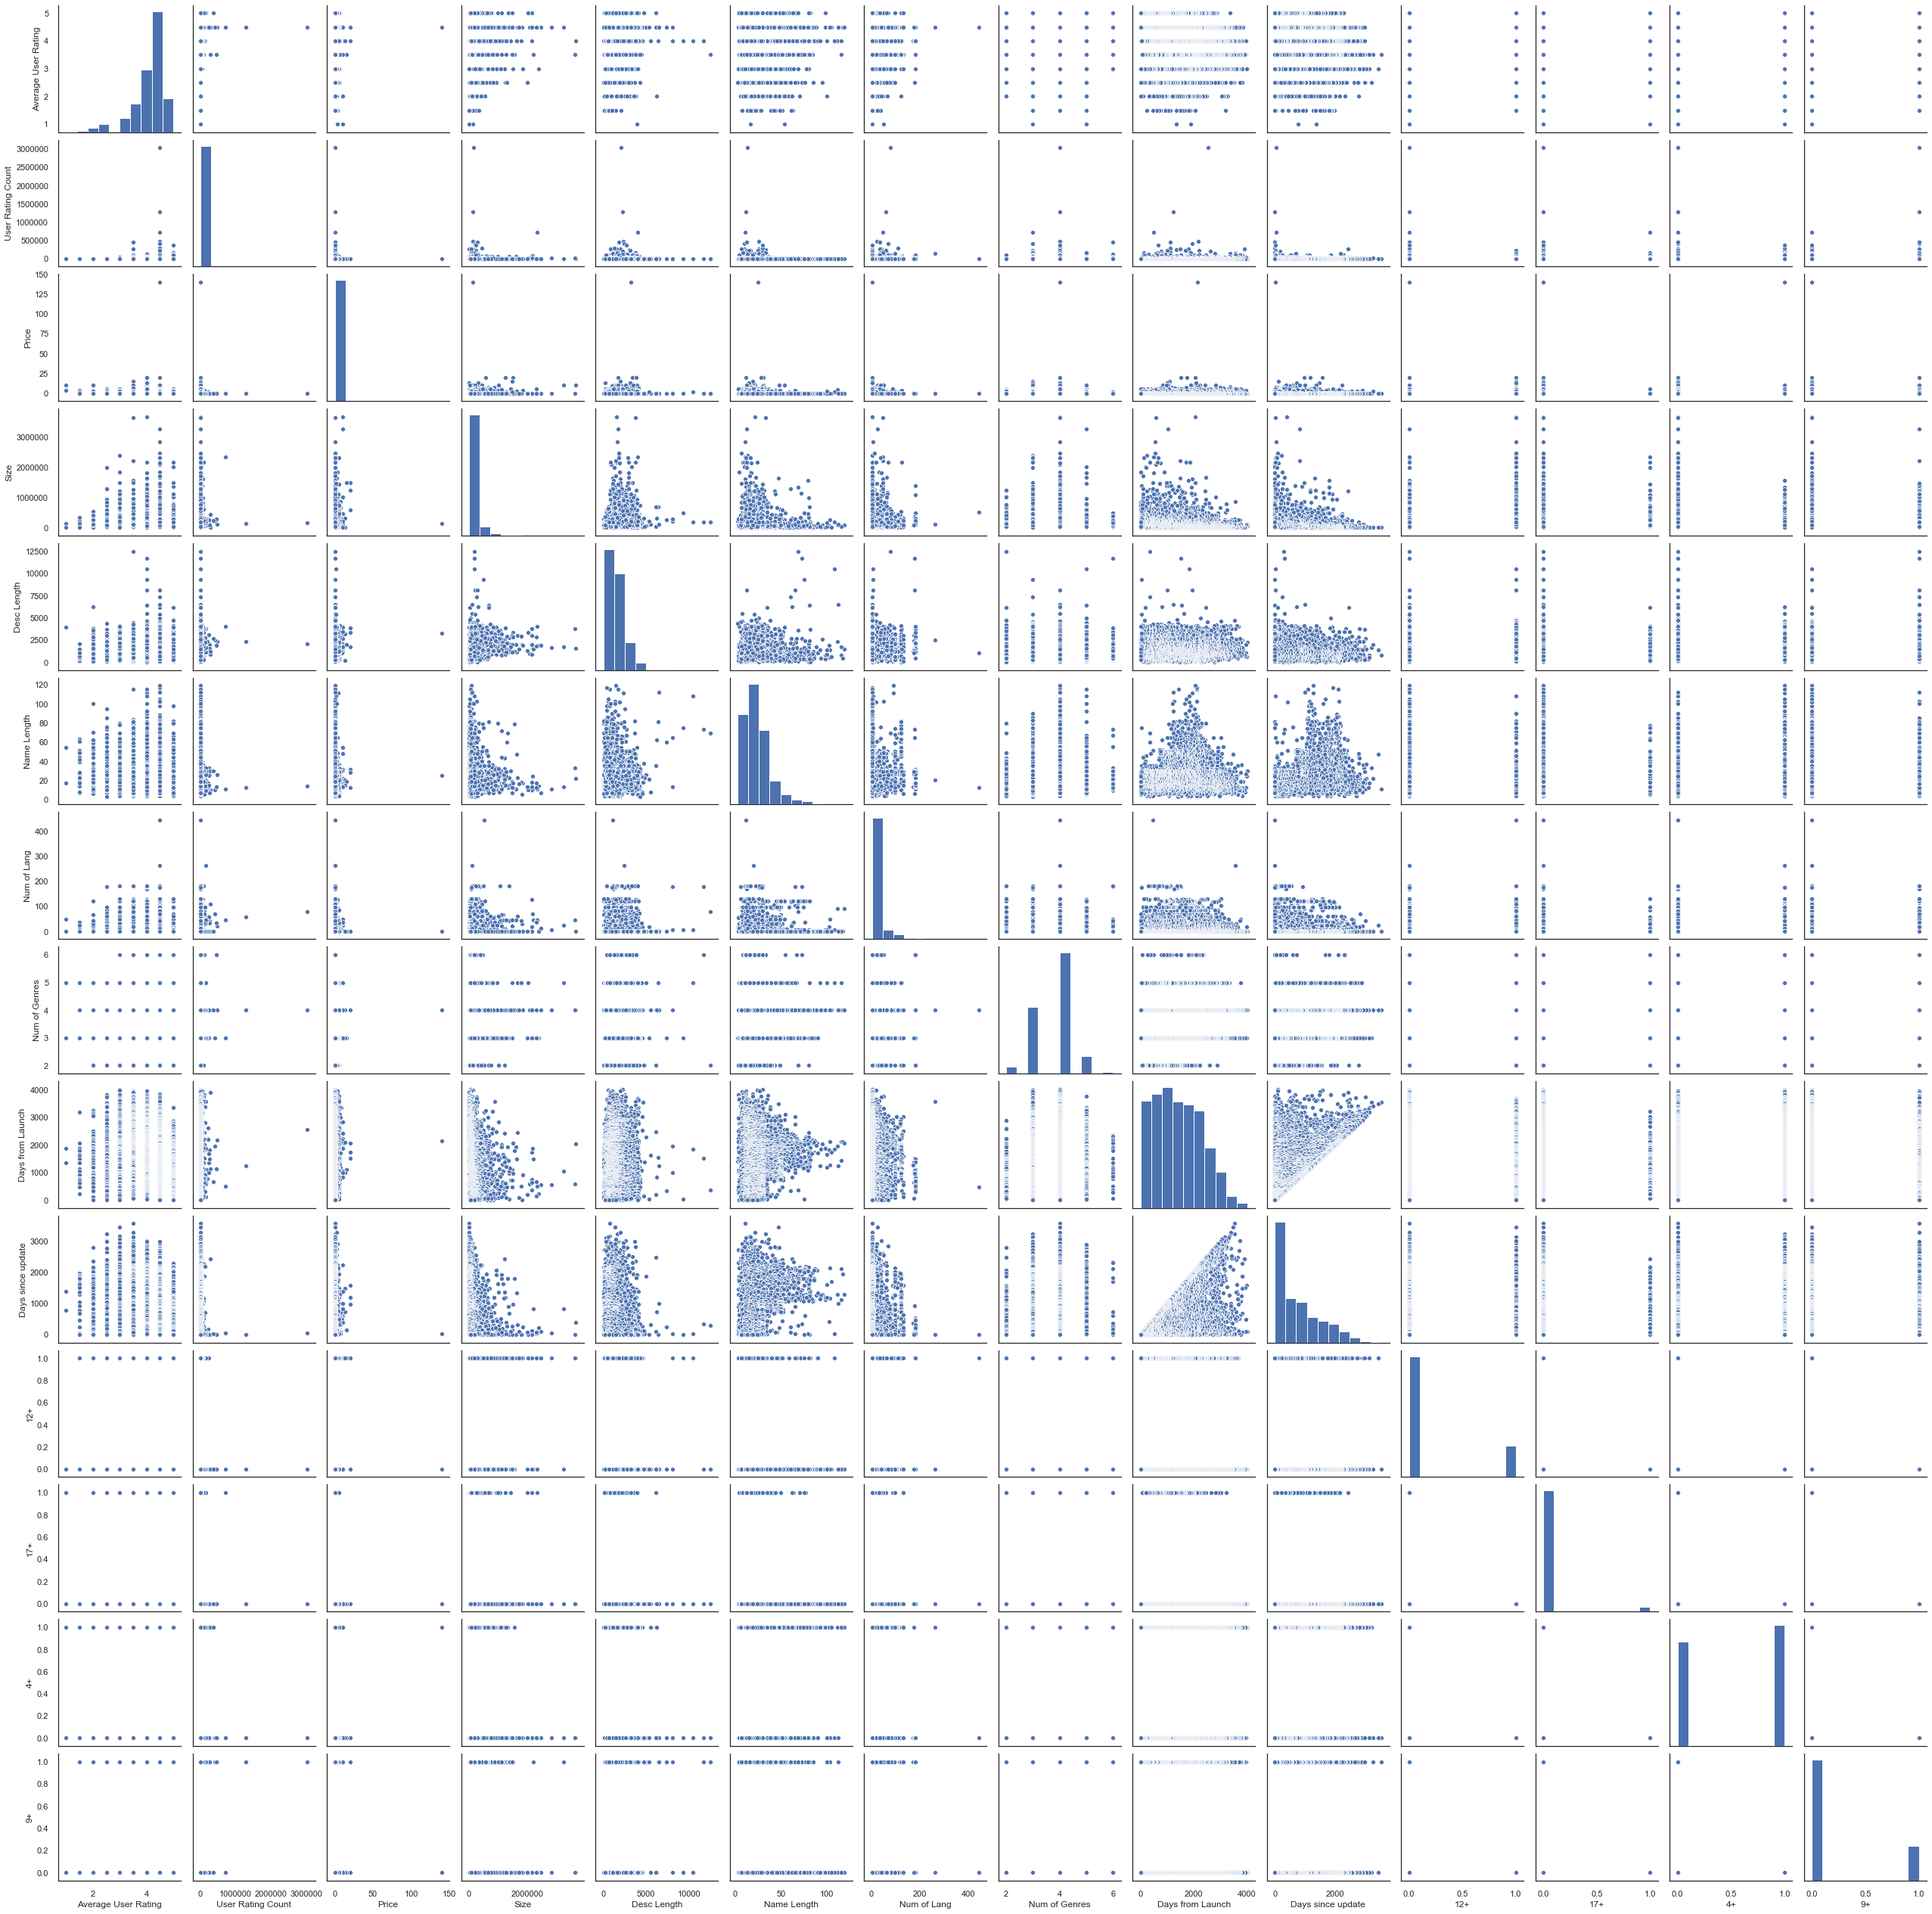

In [28]:
import seaborn as sb
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline

sns.pairplot(df)

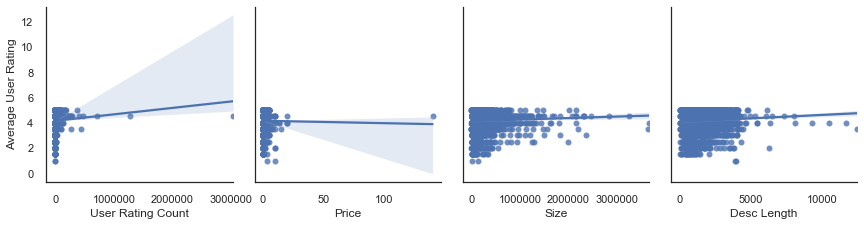

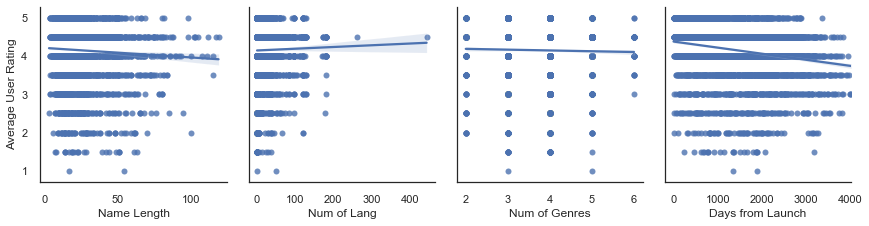

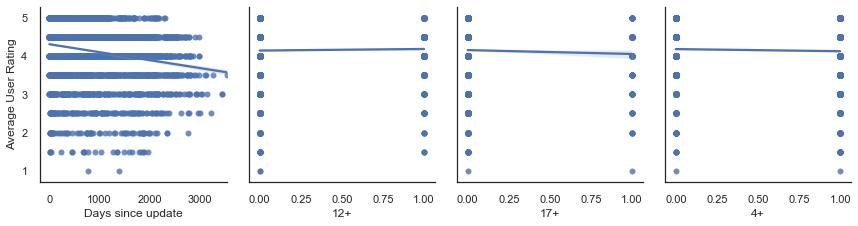

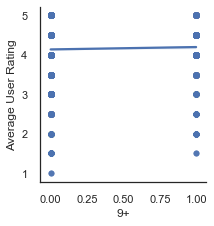

In [31]:
n = 4
features = ['User Rating Count', 'Price', 'Size', 'Desc Length', 'Name Length', 'Num of Lang', 'Num of Genres', 'Days from Launch', 'Days since update', '12+', '17+', '4+', '9+']
row_groups= [features[i:i+n] for i in range(0, len(features), n)]

for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['Average User Rating'],x_vars=i, kind="reg", height=3)

# OLS Modeling

In [32]:
#Preserve original dataframe and change column names such that it works with ols model
olsdf = df
olsdf.columns = ['Name', 'Average_User_Rating', 'User_Rating_Count', 'Price', 'In-app_Purchases', 'Description', 'Age Rating', 'Languages', 'Size', 'Primary_Genre', 'Genres', "ORD", "CVRD", 'Desc_Length', 'Name_Length', 'Num_of_Lang', 'Num_of_Genres', 'Days_from_Launch', 'Days_since_update', 'twelveup', 'seventeenup', 'fourup', 'nineup']

In [33]:
olsmodel = ols(formula='Average_User_Rating~User_Rating_Count+Price+Size+Desc_Length+Name_Length+Num_of_Lang+Num_of_Genres+Days_from_Launch+Days_since_update+twelveup+seventeenup+fourup+nineup', data=df).fit()
olsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Average_User_Rating   R-squared:                       0.066
Model:                             OLS   Adj. R-squared:                  0.064
Method:                  Least Squares   F-statistic:                     27.29
Date:                 Mon, 22 Jun 2020   Prob (F-statistic):           1.48e-60
Time:                         09:42:55   Log-Likelihood:                -4549.0
No. Observations:                 4618   AIC:                             9124.
Df Residuals:                     4605   BIC:                             9208.
Df Model:                           12                                         
Covariance Type:             nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.4878      0.047     74.808      0.000       3.396       3.579
User_Rating_Count  4.375e-07    1.8e-07      2.427      0.015    8.41e-08    7.91e-07
Price                -0.0007      0.004     -0.178      0.859      -0.009       0.007
Size              -1.031e-07   4.26e-08     -2.417      0.016   -1.87e-07   -1.95e-08
Desc_Length        2.915e-05   1.03e-05      2.819      0.005    8.88e-06    4.94e-05
Name_Length          -0.0008      0.001     -1.136      0.256      -0.002       0.001
Num_of_Lang          -0.0003      0.000     -0.958      0.338      -0.001       0.000
Num_of_Genres         0.0010      0.014      0.069      0.945      -0.027       0.029
Days_from_Launch  -9.947e-05    1.4e-05     -7.102      0.000      -0.000    -7.2e-05
Days_since_update    -0.0001   1.73e-05     -7.924      0.000      -0.000      -0.000
twelveup              0.8939      0.024     37.688      0.000       0.847       0.940
seventeenup           0.7598      0.043     17.669      0.000       0.676       0.844
fourup                0.9030      0.020     45.926      0.000       0.864       0.942
nineup                0.9311      0.023     40.271      0.000       0.886       0.976
==============================================================================
Omnibus:                     1125.025   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2546.877
Skew:                          -1.377   Prob(JB):                         0.00
Kurtosis:                       5.376   Cond. No.                     1.46e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.93e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

There Seems to be a positive correlation between average user rating and:
- User rating count 
- Desc length 
- Age groups

There seems to be a negative correlation between average user rating and:
- Size 
- Days from Launch
- Days since Last Update

There seems to be no significant relationship between average user rating and:
- Price
- Name Length
- Number of Languages
- Number of Genres

In [34]:
feature_df.drop(columns=['Price', 'Name Length', 'Num of Lang', 'Num of Genres'], inplace=True)

In [35]:
feature_df

,User Rating Count,Size,Desc Length,Days from Launch,Days since update,12+,17+,4+,9+,0,0.0,0.99,1.49,1.99,10.99,109.99,11.99,119.99,12.99,129.99,13.99,139.99,14.99,15.99,16.99,169.99,17.99,18.99,19.49,19.99,199.99,2.49,2.99,20.99,21.99,22.99,23.49,23.99,24.99,25.99,26.99,27.99,28.99,29.99,3.49,3.99,30.99,31.99,32.99,33.99,34.99,35.99,36.99,37.99,38.99,39.99,4.49,4.99,40.99,41.99,43.99,44.99,45.99,46.99,47.99,48.99,49.99,5.49,5.99,54.99,59.99,6.99,64.99,69.99,7.49,7.99,74.99,79.99,8.49,8.99,84.99,89.99,9.49,9.99,94.99,99.99
0,47.0,47532.0,2255,4021,96,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,112.0,119948.0,618,3989,1580,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,112.0,119948.0,618,3989,1580,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,95971.0,26192.0,794,3817,2290,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,357.0,51012.0,1039,3965,99,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4613,14.0,185423.0,1120,2,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4614,17.0,208268.0,3980,2,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4615,29.0,84058.0,255,3,3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4616,51.0,193566.0,682,5,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


Text(0.5, 1.0, 'Distribution of User Rating')

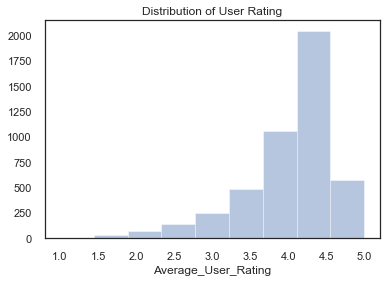

In [36]:
sns.distplot(df['Average_User_Rating'], hist=True, kde=False, bins=9).set_title('Distribution of User Rating')

Due to the fact that most of the values are around 4.0 to 4.5, it is likely that the predictions for our data will also be in that range.

# Train Test Split

Because using the same data set for testing and training could lead to miscalculations and thus inaccurate predictions, a train test split is used.

In [37]:
from sklearn.model_selection import train_test_split
target = df['Average_User_Rating']
X_train, X_test, y_train, y_test = train_test_split(feature_df, target, test_size=0.2, random_state=22)

print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ", y_test.shape)

Training set - Features:  (3694, 86) Target:  (3694,)
Training set - Features:  (924, 86) Target:  (924,)


In [38]:
# fit a model
from sklearn import linear_model

#instantiate a linear regression object
lm = linear_model.LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)


print(lm.intercept_)
print(lm.coef_)

4.178380439247272
[ 1.60282705e-06 -1.58428768e-07  1.63659325e-05 -1.09075419e-04
 -1.22946037e-04  2.79247638e-02 -1.00381998e-01  3.51094223e-02
  3.73478123e-02 -5.81449321e-01  2.49923136e-01  1.09244978e-01
  5.74123480e-01  1.38412759e-01 -1.35158519e-01 -2.88959390e-02
  3.47929504e-02 -1.86067852e+00 -2.11120819e-02  5.98484366e-01
 -6.77108371e-02  2.28476603e-01 -8.64871236e-02  1.04269119e-02
 -1.13708090e-01  4.62130334e-15  3.77037183e-02 -2.52260546e-01
 -5.88963333e-01  2.44869169e-03 -2.93540255e-01  1.31027034e-01
  3.61302763e-02 -3.44278252e-01 -3.09965526e-01  2.97071040e-01
  7.92110864e-01 -2.27835793e-01  9.33689169e-03 -4.28829442e-01
  1.49696555e-01 -3.21114234e-01 -7.60112580e-02  4.85177275e-04
  6.59547656e-01  2.23076178e-02 -5.56232934e-02 -5.20238103e-01
  4.87278081e-02  4.00670876e-02  7.31980050e-02 -2.82160455e-01
 -1.20608057e+00 -2.39728349e-01 -1.00194963e+00  5.25667862e-02
 -2.08048210e-01  5.65358110e-02  4.04172722e-01 -3.15535974e-01
  1.228

In [63]:
print ("R^2 Score:", lm.score(X_train, y_train))
#This value is rather low. This means that the independent variable is not explaining much of the variation of the dependent variable.

R^2 Score: 0.12135651890733312


In [40]:
y_train_pred = lm.predict(X_train)

In [41]:
from sklearn import metrics

train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Mean Absolute Error:', train_mae)
print('Mean Squared Error:',  train_mse)

Mean Absolute Error: 0.4614716274773835
Mean Squared Error: 0.38519694330378934


In [42]:
rating_std = target.std()

print('Z-Score of Mean Absolute Error:', train_mae/rating_std )
print('Z-Score of Root Mean Squared Error:' , train_rmse/rating_std)

Z-Score of Mean Absolute Error: 0.6880465672388013
Z-Score of Root Mean Squared Error: 0.925367503060411


In [64]:
from sklearn.metrics import accuracy_score

accuracy = lm.score(X_test, y_test)

print('Accuracy: %.2f' % (accuracy*100))
#this is extremely low accuracy, less than 1%. Most of the predicted data points are wrong.
#To boost accuracy, would need more data, more data cleaning, better feature engineering, selection, etc.

Accuracy: 0.84


In [44]:
predictions = lm.predict(X_test)
predictions

array([4.57521822, 4.21842939, 3.99893352, 3.44702048, 3.62698336,
       4.37362729, 3.94159031, 4.30876803, 4.14866878, 4.17161575,
       4.08482432, 4.36428505, 4.30324346, 4.12018333, 4.42135353,
       4.37076078, 4.34132156, 4.16502594, 4.18549237, 3.88397088,
       3.93095762, 4.23529232, 4.42080065, 4.29923937, 4.34252319,
       3.95184916, 4.01216577, 3.82432027, 3.90674351, 4.28267388,
       4.25796743, 4.16316517, 4.14592315, 4.20183589, 3.69905655,
       3.74719307, 4.16260405, 4.19431411, 3.99035452, 4.33342345,
       4.25224821, 4.53798745, 3.84474424, 4.22748951, 4.2765485 ,
       4.10329948, 4.29134113, 4.06632336, 4.182395  , 4.29208315,
       4.28775025, 3.84365034, 4.47114527, 4.27075185, 4.11620314,
       4.42457956, 4.00130174, 4.17489272, 4.41658328, 4.43090782,
       4.39732834, 3.85549278, 3.8600529 , 3.87687036, 4.14005528,
       4.14012703, 4.23785957, 4.19255608, 4.02470887, 4.50751896,
       4.27985238, 4.05253528, 3.69235275, 3.85817646, 4.16384

Text(0, 0.5, 'Predictions')

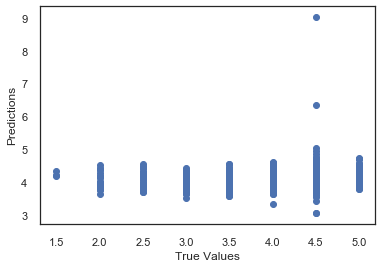

In [65]:
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

Text(0.5, 1.0, 'Distribution of User Rating')

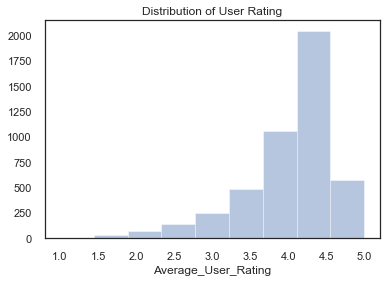

In [66]:
sns.distplot(df['Average_User_Rating'], hist=True, kde=False, bins=9).set_title('Distribution of User Rating')
#The prediction chart has some slight resemblance to the predicted distribution, but still looks very off.

In [46]:
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, predictions)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, predictions)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))

MAE: 0.5093204200859115
MSE: 0.48994287088367916
RMSE: 0.6999591922988648


In [47]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squared Error:', mse_train)
print('Test Mean Squared Error:', mse_test)

Train Mean Squared Error: 0.38519694330378934
Test Mean Squared Error: 0.48994287088367916


In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train_preprocessed = preprocessing.normalize(X_train)
X_test_preprocessed = preprocessing.normalize(X_test)

lin_model = LinearRegression()
lin_model.fit(X_train_preprocessed, y_train)

y_train_predict = lin_model.predict(X_train_preprocessed)

rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))

print('Train RMSE is {}'.format(rmse))

y_test_predict = lin_model.predict(X_test_preprocessed)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

print('Test RMSE is {}'.format(rmse))

Train RMSE is 0.6275028135600045
Test RMSE is 0.7058955950949988


# Random Forest Regressor

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import metrics

#features = ['User_Rating_Count', 'Price', 'In_app_Purchases', 'Size', 'Desc_Length', 'Name_Length', 'Num_of_Lang', 'Num_of_Genres', 'Days_from_Launch', 'Days_since_update']
#mod_df = df[features]

#y = target        
#X = mod_df

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [50]:
game_model = RandomForestRegressor(n_estimators=100, max_leaf_nodes=50, random_state=1)
game_model.fit(X_train, y_train)

game_model_test_prediction = game_model.predict(X_test)
game_model_test_mae = mean_absolute_error(game_model_test_prediction, y_test)
game_model_test_rmse = np.sqrt(metrics.mean_squared_error(game_model_test_prediction, y_test))
game_model_R2 = r2_score(game_model_test_prediction, y_test)

print("MAE: {}".format(game_model_test_mae))
print("RMSE: {}".format(game_model_test_rmse))
print("R^2: {}".format(game_model_R2))

MAE: 0.4557234847527395
RMSE: 0.6312282262663949
R^2: -4.735706910297985


# Lasso Embedded

In [51]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01, normalize=True)

lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

train_rmse = metrics.mean_absolute_error(y_train, y_train_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Error: '+ str(train_rmse) )
print('Testing Error: '+ str(test_rmse) )

Training Error: 0.5099715396189668
Testing Error: 0.7037826648094673


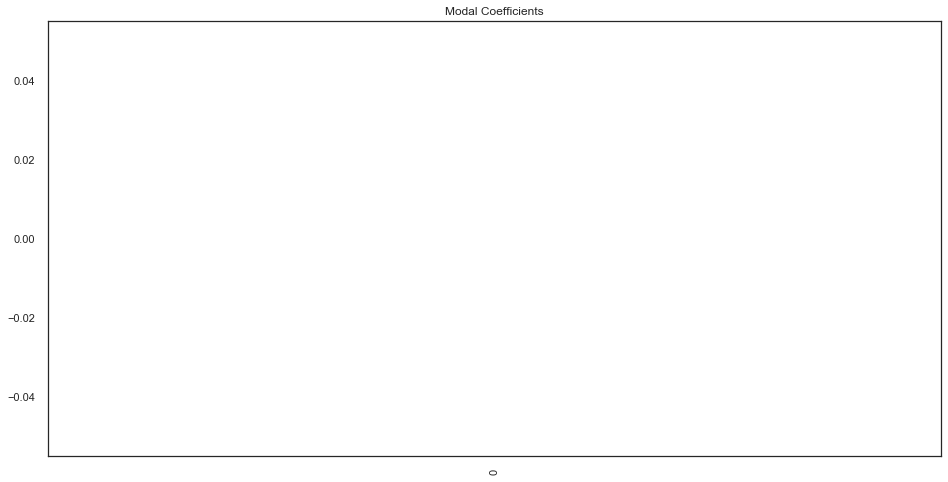

In [52]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [53]:
from sklearn.linear_model import Lasso

lasso1 = Lasso(alpha=.1, normalize=False)

lasso1.fit(X_train,y_train)

y_train_lasso1 = lasso1.predict(X_train)
y_pred_lasso1 = lasso1.predict(X_test)

train_rmse_lasso1 = metrics.mean_absolute_error(y_train, y_train_lasso1)
test_rmse_lasso1 = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso1))
print('Training Error: '+ str(train_rmse_lasso1) )
print('Testing Error: '+ str(test_rmse_lasso1) )

Training Error: 0.4766320325810336
Testing Error: 0.710583523343593


# Thoughts about models

The three models used so far are Linear Regression, Random Forest Regressor, and Lasso Regression.
While Random Forest Regressor has the lowest RMSE which would suggest the model accurately predicts the best line of fit, it has a negative R-squared value which would suggest that the model does not fit the data very well.

While the Lasso regression model does have the least RMSE, the training error is a little low 

# Selecting the top 10 variables using F-Test

In [54]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=10)

selector.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


SelectKBest(k=10, score_func=<function f_regression at 0x1a2f49e0e0>)

In [55]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]

In [56]:
list(selected_columns)
#It appears these are the most important variables according to the F-test

['User Rating Count',
 'Desc Length',
 'Days from Launch',
 'Days since update',
 '0.99',
 '1.99',
 '19.99',
 '4.99',
 '6.99',
 '9.99']

In [57]:
list(removed_columns)

['Size',
 '12+',
 '17+',
 '4+',
 '9+',
 '0',
 '0.0',
 '1.49',
 '10.99',
 '109.99',
 '11.99',
 '119.99',
 '12.99',
 '129.99',
 '13.99',
 '139.99',
 '14.99',
 '15.99',
 '16.99',
 '169.99',
 '17.99',
 '18.99',
 '19.49',
 '199.99',
 '2.49',
 '2.99',
 '20.99',
 '21.99',
 '22.99',
 '23.49',
 '23.99',
 '24.99',
 '25.99',
 '26.99',
 '27.99',
 '28.99',
 '29.99',
 '3.49',
 '3.99',
 '30.99',
 '31.99',
 '32.99',
 '33.99',
 '34.99',
 '35.99',
 '36.99',
 '37.99',
 '38.99',
 '39.99',
 '4.49',
 '40.99',
 '41.99',
 '43.99',
 '44.99',
 '45.99',
 '46.99',
 '47.99',
 '48.99',
 '49.99',
 '5.49',
 '5.99',
 '54.99',
 '59.99',
 '64.99',
 '69.99',
 '7.49',
 '7.99',
 '74.99',
 '79.99',
 '8.49',
 '8.99',
 '84.99',
 '89.99',
 '9.49',
 '94.99',
 '99.99']

In [58]:
#running linear regression using selected columns only
lm_kbest = LinearRegression()

lm_kbest = lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(X_train[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(X_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)

Training Root Mean Squared Error: 0.631179726059033
Testing Root Mean Squared Error: 0.6875919569447629


In [59]:
#running random forest regressor using selected columns only
game_model = RandomForestRegressor(n_estimators=100, max_leaf_nodes=50, random_state=1)
game_model.fit(X_train[selected_columns], y_train)

game_model_test_prediction = game_model.predict(X_test[selected_columns])
game_model_test_mae = mean_absolute_error(game_model_test_prediction, y_test)
game_model_test_rmse = np.sqrt(metrics.mean_squared_error(game_model_test_prediction, y_test))
game_model_R2 = r2_score(game_model_test_prediction, y_test)

print("MAE: {}".format(game_model_test_mae))
print("RMSE: {}".format(game_model_test_rmse))
print("R^2: {}".format(game_model_R2))

MAE: 0.46403508717062264
RMSE: 0.6421341291263978
R^2: -4.829119163879699


In [60]:
#running lasso regression using selected columns only
lasso = Lasso(alpha=0.01, normalize=True)

lasso.fit(X_train[selected_columns],y_train)

y_train_pred = lasso.predict(X_train[selected_columns])
y_pred = lasso.predict(X_test[selected_columns])

train_rmse = metrics.mean_absolute_error(y_train, y_train_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Error: '+ str(train_rmse) )
print('Testing Error: '+ str(test_rmse) )

Training Error: 0.5099715396189668
Testing Error: 0.7037826648094673


Training Error: 0.4778137699451019
Testing Error: 0.7050048815451149


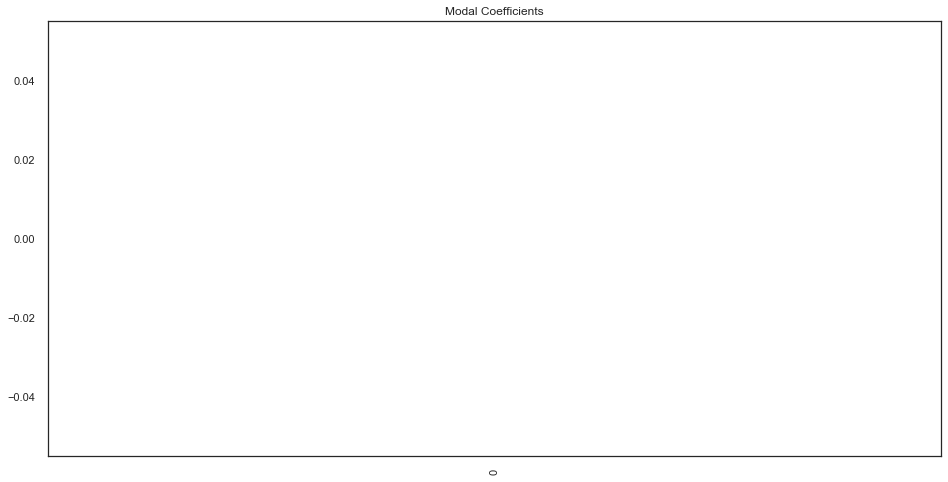

In [61]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train[selected_columns].columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

from sklearn.linear_model import Lasso

lasso1 = Lasso(alpha=.1, normalize=False)

lasso1.fit(X_train[selected_columns],y_train)

y_train_lasso1 = lasso1.predict(X_train[selected_columns])
y_pred_lasso1 = lasso1.predict(X_test[selected_columns])

train_rmse_lasso1 = metrics.mean_absolute_error(y_train, y_train_lasso1)
test_rmse_lasso1 = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso1))
print('Training Error: '+ str(train_rmse_lasso1) )
print('Testing Error: '+ str(test_rmse_lasso1) )

This feature selection has decreased the RMSE for linear regression and lasso but not random forest.